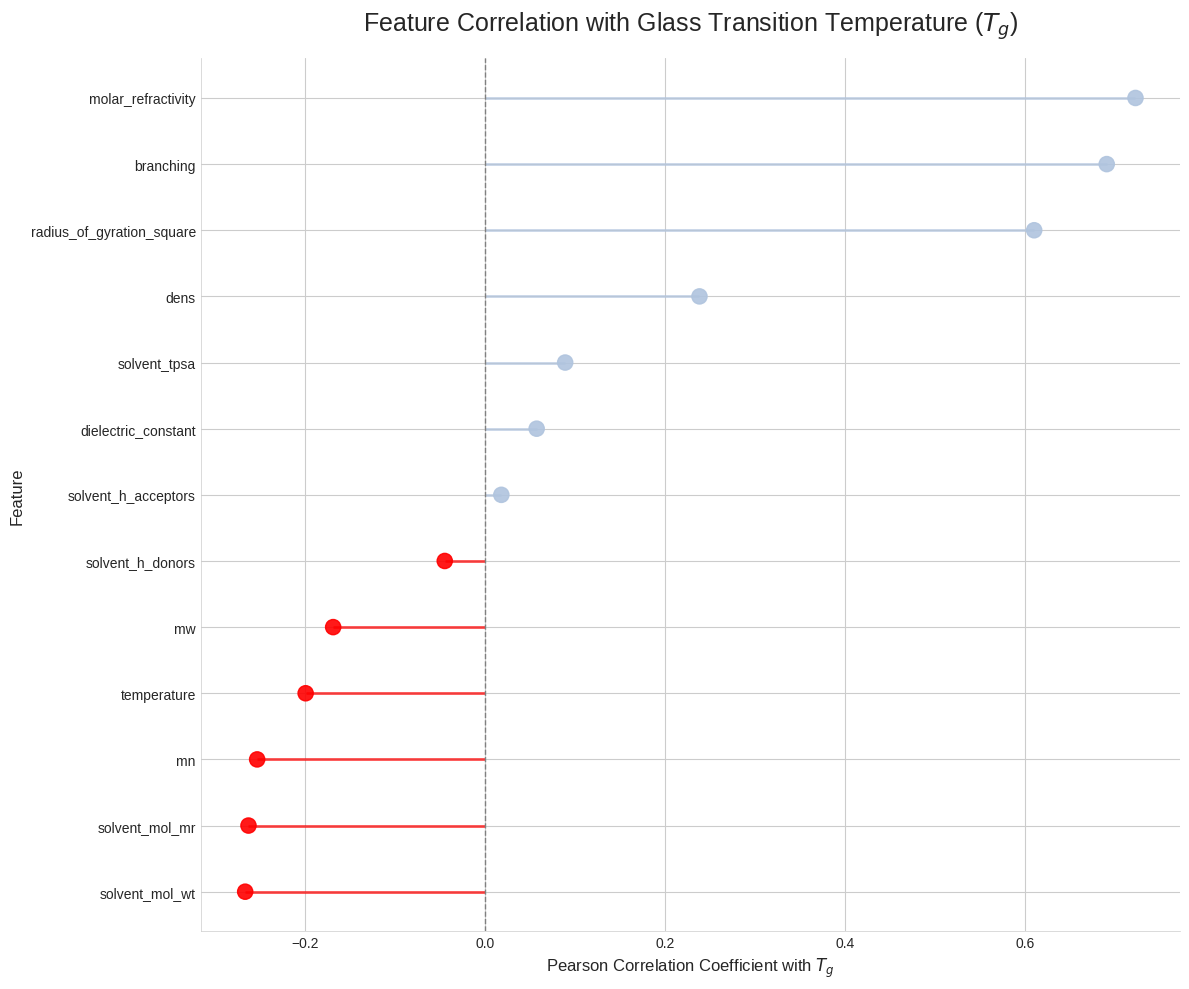

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_correlation_lollipop_plot():
    """
    Reads data from a CSV file, calculates the Pearson correlation of each
    numerical feature with the target variable 'tg', and generates a
    lollipop plot to visualize these correlations.
    """
    try:
        # Load the dataset from the specified Kaggle input path
        df = pd.read_csv('/kaggle/input/dataset-for-prediction-of-tg/data_augmented.csv')

        # --- Data Preparation ---
        # Remove the 'radius_of_gyration' column to keep only its squared version
        if 'radius_of_gyration' in df.columns:
            df = df.drop(columns=['radius_of_gyration'])

        # Select only the remaining columns with numerical data types for correlation analysis
        numeric_df = df.select_dtypes(include=np.number)

        # --- Correlation Calculation ---
        # Calculate the full Pearson correlation matrix
        corr_matrix = numeric_df.corr(method='pearson')

        # Isolate the correlations with respect to the 'tg' column
        # Drop 'tg' itself (correlation is always 1) and sort for a clean plot
        tg_correlations = corr_matrix['tg'].drop('tg').sort_values()

        # --- Plotting ---
        # Create a color list: 'red' for negative, 'lightsteelblue' for positive correlation
        colors = ['red' if c < 0 else 'lightsteelblue' for c in tg_correlations]

        # Set up the matplotlib figure
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(12, 10))

        # Create the horizontal 'stems' of the lollipop plot
        ax.hlines(
            y=tg_correlations.index,
            xmin=0,
            xmax=tg_correlations.values,
            color=colors,
            alpha=0.7,
            linewidth=2
        )

        # Create the 'dots' of the lollipop plot
        ax.scatter(
            tg_correlations.values,
            tg_correlations.index,
            color=colors,
            s=120,
            alpha=0.9
        )

        # --- Aesthetics and Labels ---
        # Set a clear title and labels
        ax.set_title('Feature Correlation with Glass Transition Temperature ($T_g$)', fontsize=18, pad=20)
        ax.set_xlabel('Pearson Correlation Coefficient with $T_g$', fontsize=12)
        ax.set_ylabel('Feature', fontsize=12)
        
        # Add a vertical line at x=0 to clearly separate positive and negative correlations
        ax.axvline(x=0, color='grey', linestyle='--', linewidth=1)

        # Improve layout and readability
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_linewidth(0.5)
        
        # Ensure the layout is tight to prevent labels from being cut off
        plt.tight_layout()

        # Display the plot
        plt.show()

    except FileNotFoundError:
        print("Error: '/kaggle/input/dataset-for-prediction-of-tg/data_augmented.csv' not found.")
        print("Please make sure the CSV file path is correct.")
    except KeyError:
        print("Error: The CSV must contain a 'tg' column and other numerical columns.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    create_correlation_lollipop_plot()



Parallel Coordinates Plot with Viridis colormap saved as 'model_performance_pcp_viridis.png'


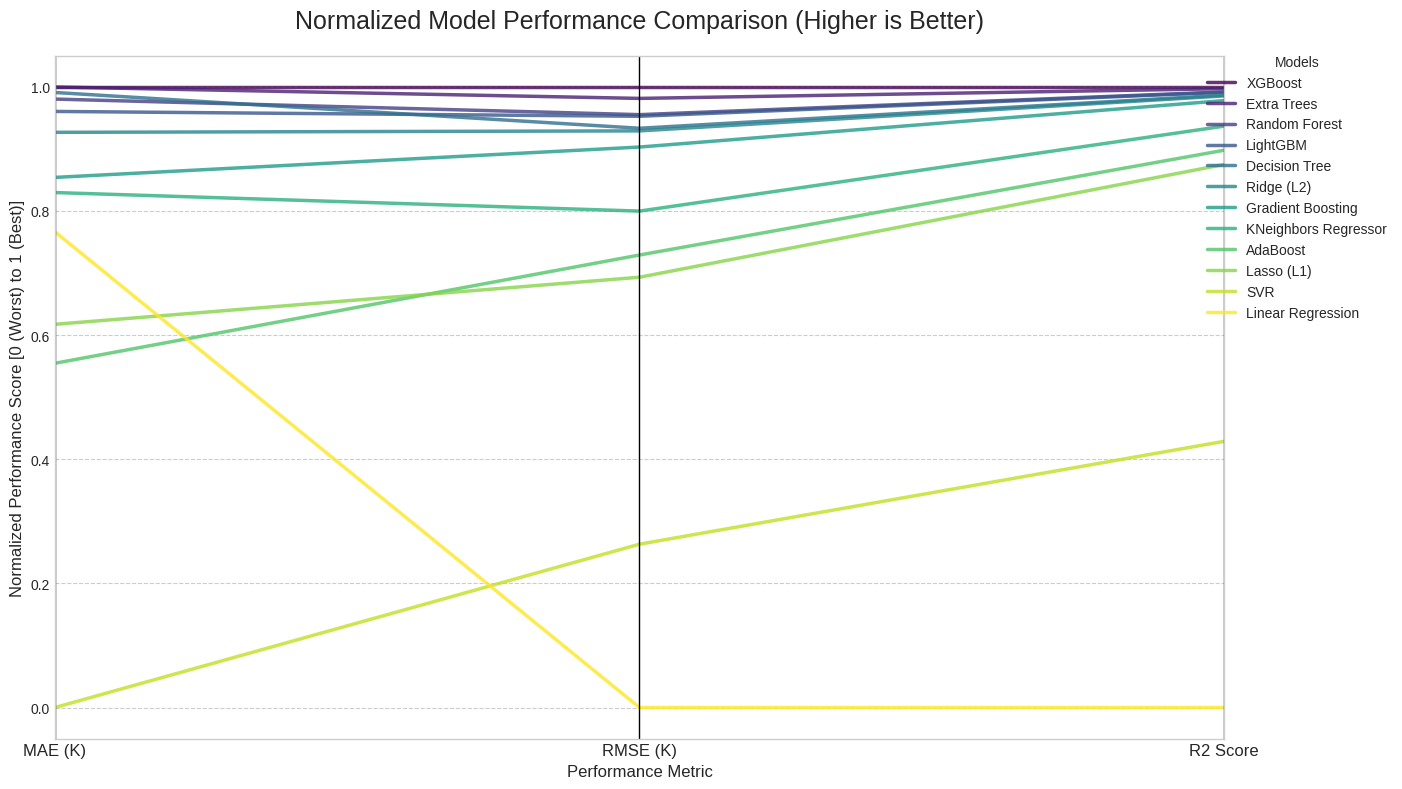

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Define the data from your table
data = {
    'Model': [
        'XGBoost', 'Extra Trees', 'Random Forest', 'LightGBM', 'Decision Tree',
        'Ridge (L2)', 'Gradient Boosting', 'KNeighbors Regressor', 'AdaBoost',
        'Lasso (L1)', 'SVR', 'Linear Regression'
    ],
    'MAE (K)': [
        2.543, 2.561, 3.953, 5.374, 3.193, 7.778, 12.964, 14.703,
        34.342, 29.859, 73.936, 19.206
    ],
    'RMSE (K)': [
        9.848, 12.007, 15.035, 15.337, 17.572, 18.061, 21.072, 33.008,
        41.192, 45.331, 95.078, 125.521
    ],
    'R2 Score': [
        0.9932, 0.9899, 0.9842, 0.9836, 0.9785, 0.9772, 0.9690, 0.9240,
        0.8816, 0.8566, 0.3691, -0.0996
    ]
}

# 2. Create a Pandas DataFrame
df = pd.DataFrame(data)

# 3. --- Critical Step: Normalize the Data ---
# A PCP requires all axes to be on a similar scale. We'll scale from 0 to 1.
# We also want "up" to be "better" for all metrics to make it easy to read.

# Set 'Model' as the index for scaling
df_norm = df.set_index('Model')

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Scale all numeric columns
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_norm),
    columns=df_norm.columns,
    index=df_norm.index
)

# **Invert the error metrics (MAE, RMSE)** so 1 is best (lowest error)
# and 0 is worst (highest error).
df_scaled['MAE (K)'] = 1 - df_scaled['MAE (K)']
df_scaled['RMSE (K)'] = 1 - df_scaled['RMSE (K)']

# The R2 Score is already scaled correctly (higher is better).
# We just need to add the 'Model' column back for plotting.
df_scaled = df_scaled.reset_index()

# 4. --- Create the Plot ---
# Set a good figure size
plt.style.use('seaborn-v0_8-whitegrid') # Use a nice clean style
fig, ax = plt.subplots(figsize=(14, 8))

# Generate the parallel coordinates plot using the 'viridis' colormap
pd.plotting.parallel_coordinates(
    df_scaled,
    'Model',
    colormap=plt.get_cmap("viridis"), # Using 'viridis' as requested
    linewidth=2.5,
    alpha=0.8 # Slightly transparent lines
)

# 5. --- Styling and Aesthetics ---
# Set title and labels with more padding
ax.set_title('Normalized Model Performance Comparison (Higher is Better)', fontsize=18, pad=20)
ax.set_ylabel('Normalized Performance Score [0 (Worst) to 1 (Best)]', fontsize=12)
ax.set_xlabel('Performance Metric', fontsize=12)

# Improve readability of axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Remove the default y-axis grid lines from the plot function for a cleaner look
ax.grid(False)
# Add a custom, subtle horizontal grid
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.4)

# Move the legend outside of the plot area to prevent overlap
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.02), title='Models')

# Ensure the layout is tight and clean
plt.tight_layout()

# 6. Save the final image
plt.savefig('model_performance_pcp_viridis.png', dpi=300) # Save in high resolution

print("Parallel Coordinates Plot with Viridis colormap saved as 'model_performance_pcp_viridis.png'")


In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import os

print("--- Generating Enhanced Interactive Simpson's Paradox Plot (Using Top Polymers) ---")

try:
    # --- 1. Load YOUR dataset ---
    print("Loading data_augmented.csv...")
    file_path = '/kaggle/input/dataset-for-prediction-of-tg/data_augmented.csv' # Adjust if needed
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Error: File not found at '{file_path}'.")
    df = pd.read_csv(file_path)

    # --- 2. Automatically Find the Top 2 Most Frequent Polymers ---
    print("Finding the top 2 most frequent polymers...")
    polymer_counts = df['polymer_name'].value_counts()
    if len(polymer_counts) < 2:
        raise ValueError("Dataset contains fewer than 2 unique polymer types.")

    family1_name = polymer_counts.index[0]
    family2_name = polymer_counts.index[1]
    print(f"Using top 2 polymers: '{family1_name}' and '{family2_name}'")

    # --- 3. Filter Data ---
    df_family1 = df[df['polymer_name'] == family1_name].copy().dropna(subset=['mw', 'tg'])
    df_family2 = df[df['polymer_name'] == family2_name].copy().dropna(subset=['mw', 'tg'])
    combined_df = pd.concat([df_family1, df_family2])

    if len(combined_df) < 10 or len(df_family1) < 2 or len(df_family2) < 2: # Need at least 2 points per group for trendlines
         raise ValueError("Insufficient data points after removing missing values for the top 2 polymers to draw trends.")

    print(f"Plotting {len(df_family1)} valid samples for '{family1_name}' and {len(df_family2)} for '{family2_name}'.")

    # --- 4. Calculate Trendlines ---
    models_ind = {}
    # Individual Families
    for i, df_group in enumerate([df_family1, df_family2]):
        name = df_group['polymer_name'].iloc[0]
        X_group = df_group[['mw']]
        y_group = df_group['tg']
        model = LinearRegression().fit(X_group, y_group)
        models_ind[name] = model

    # Combined Data
    X_comb = combined_df[['mw']]
    y_comb = combined_df['tg']
    model_comb = LinearRegression().fit(X_comb, y_comb)
    x_range = np.linspace(X_comb.min(), X_comb.max(), 100)
    y_range_comb = model_comb.predict(x_range)

    # --- 5. Create the Plot ---
    print("Creating Plotly figure...")
    fig = go.Figure()

    colors = ['#1f77b4', '#ff7f0e'] # Blue, Orange
    markers = ['circle', 'square']
    # Shorten names only if excessively long
    family_names_display = [f"{name[:30]}..." if len(name)>30 else name for name in [family1_name, family2_name]]

    for i, df_group in enumerate([df_family1, df_family2]):
        name = df_group['polymer_name'].iloc[0]
        fig.add_trace(go.Scatter(
            x=df_group['mw'], y=df_group['tg'],
            mode='markers',
            marker=dict(color=colors[i], size=8, symbol=markers[i], opacity=0.7, line=dict(width=1, color='DarkSlateGrey')),
            name=family_names_display[i] # Legend entry for scatter points
        ))
        # Add individual trendlines
        x_group_range = np.linspace(df_group[['mw']].min(), df_group[['mw']].max(), 100)
        y_group_range = models_ind[name].predict(x_group_range)
        fig.add_trace(go.Scatter(
            x=x_group_range.squeeze(), y=y_group_range,
            mode='lines',
            line=dict(color=colors[i], width=2, dash='dash'),
            name=f'Trend ({family_names_display[i]})', # Cleaner legend
            hoverinfo='skip' # Don't show hover info for lines
        ))

    # Add Overall (Misleading) Trendline
    fig.add_trace(go.Scatter(
        x=x_range.squeeze(), y=y_range_comb,
        mode='lines',
        line=dict(color='red', width=3, dash='solid'),
        name='Misleading Trend (Combined)', # Cleaner legend
        hoverinfo='skip'
    ))

    # --- 6. Enhance Layout & Annotations ---
    fig.update_layout(
        title=dict(text="<b>Simpson's Paradox Illustrated: Molecular Weight vs. Tg</b>", font=dict(size=20), x=0.5),
        xaxis_title="Weight-Average Molecular Weight (Mw, g/mol)",
        yaxis_title="Glass Transition Temperature (Tg, K)",
        legend_title_text='Polymer Family / Trend',
        hovermode='closest',
        plot_bgcolor='white', # Clean background
        # --- REMOVE GRIDLINES & FORMAT X-AXIS ---
        xaxis=dict(showgrid=False, zeroline=False, tickformat=',.0f'), # Format ticks as numbers with commas
        yaxis=dict(showgrid=False, zeroline=False),
        xaxis_showline=True, yaxis_showline=True, # Keep axis lines
        xaxis_linecolor='black', yaxis_linecolor='black',
        font=dict(family="Arial, sans-serif", size=12, color="black")
    )

    # Add annotations to highlight the paradox (adjust positions slightly if needed)
    fig.add_annotation(x=df_family1['mw'].quantile(0.5), y=df_family1['tg'].max()+5, # Use quantile for better centering
                       text="Positive Trend (Family 1)", showarrow=True, arrowhead=2, ax=-40, ay=-40, font=dict(color=colors[0]))
    fig.add_annotation(x=df_family2['mw'].quantile(0.5), y=df_family2['tg'].min()-5,
                       text="Positive Trend (Family 2)", showarrow=True, arrowhead=2, ax=40, ay=40, font=dict(color=colors[1]))
    # Predict midpoint for annotation placement
    mid_x = combined_df['mw'].mean()
    mid_y_pred = model_comb.predict(np.array([[mid_x]]))[0] + 50 # Add offset from line
    fig.add_annotation(x=mid_x, y=mid_y_pred,
                       text="<b>Negative Trend<br>(Combined Data!)</b>", showarrow=True, arrowhead=4, bordercolor="red", borderwidth=1, bgcolor="rgba(255,0,0,0.1)",
                       ax=0, ay=-60, font=dict(color="red", size=13))


    print("Displaying interactive plot...")
    fig.show()

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'.")
except ValueError as ve:
    print(f"Error: {ve}") # Print specific value errors (like insufficient data)
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Generating Enhanced Interactive Simpson's Paradox Plot (Using Top Polymers) ---
Loading data_augmented.csv...
Finding the top 2 most frequent polymers...
Using top 2 polymers: 'polystyrene' and 'polyisobutylene'
Plotting 194 valid samples for 'polystyrene' and 126 for 'polyisobutylene'.
Creating Plotly figure...
Displaying interactive plot...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



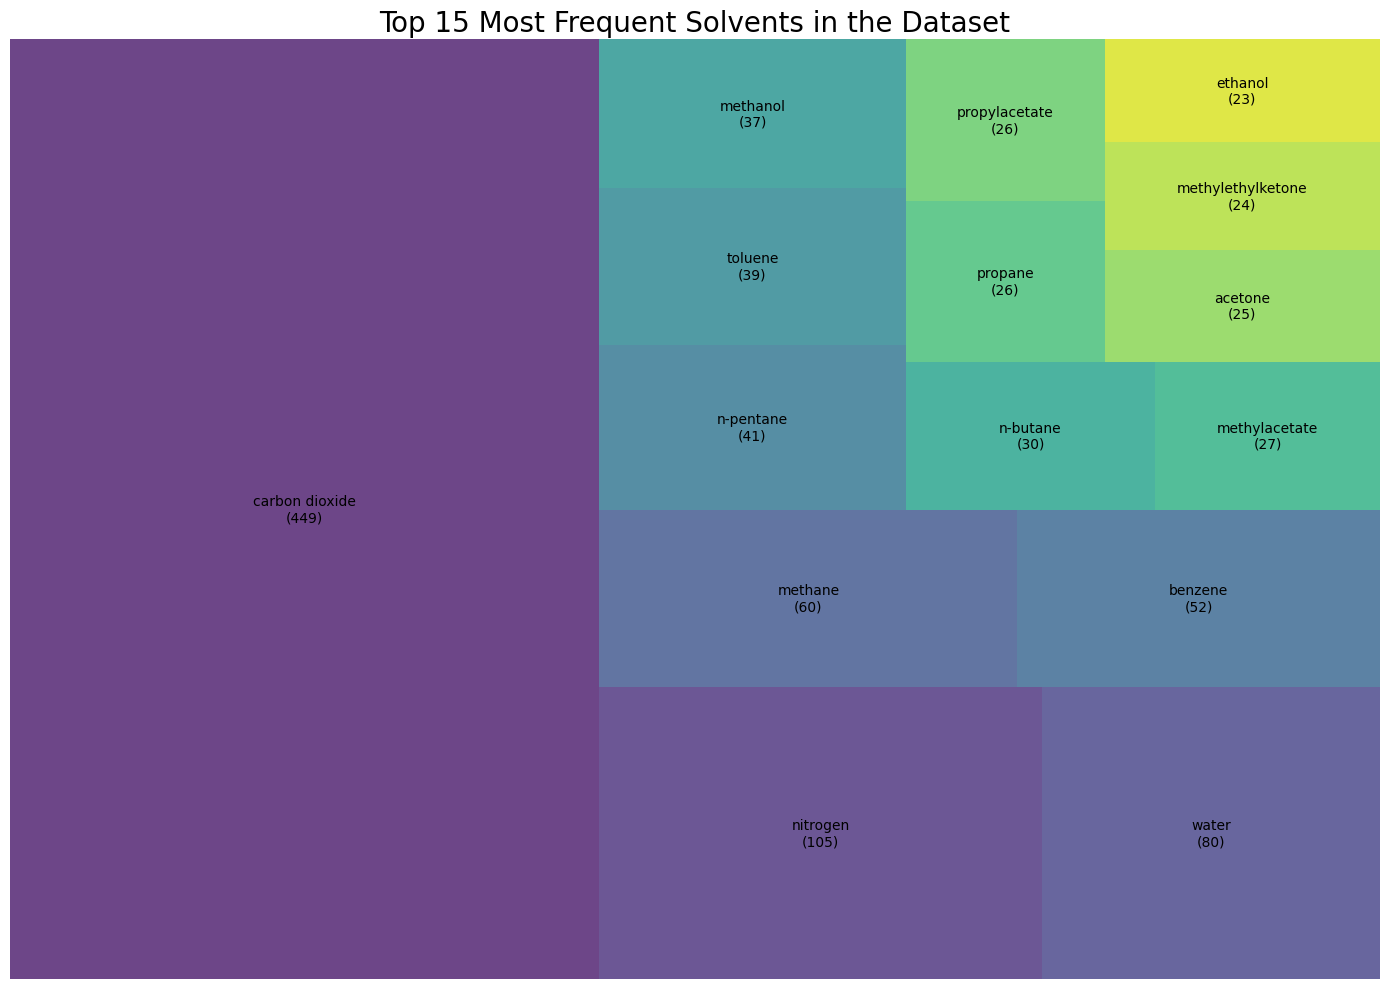

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

def create_solvent_treemap():
    """
    Reads solvent data from a CSV, identifies the 15 most frequent solvents,
    and visualizes them as a treemap using the 'viridis' color scheme.
    """
    try:
        # Load the dataset from the uploaded CSV file
        df = pd.read_csv('/kaggle/input/dataset-for-prediction-of-tg/data_augmented.csv')

        # --- Data Preparation ---
        # Calculate the frequency of each solvent and get the top 15
        top_solvents = df['solvent_name'].value_counts().nlargest(15)

        # --- Plotting ---
        plt.style.use('default')
        plt.figure(figsize=(14, 10))

        # Generate a color palette from the 'viridis' colormap
        colors = sns.color_palette('viridis', n_colors=len(top_solvents))
        
        # Create labels for each rectangle in the treemap, including the count
        labels = [f"{name}\n({count})" for name, count in top_solvents.items()]

        # Generate the treemap
        squarify.plot(
            sizes=top_solvents.values,
            label=labels,
            color=colors,
            alpha=0.8,
            text_kwargs={'fontsize': 10}
        )

        # --- Aesthetics and Labels ---
        plt.title('Top 15 Most Frequent Solvents in the Dataset', fontsize=20)
        plt.axis('off')  # Hide the axes for a cleaner look
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print("Error: 'data_augmented.csv' not found.")
        print("Please make sure the CSV file is in the same directory as the script.")
    except KeyError:
        print("Error: The CSV must contain a 'solvent_name' column.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    create_solvent_treemap()



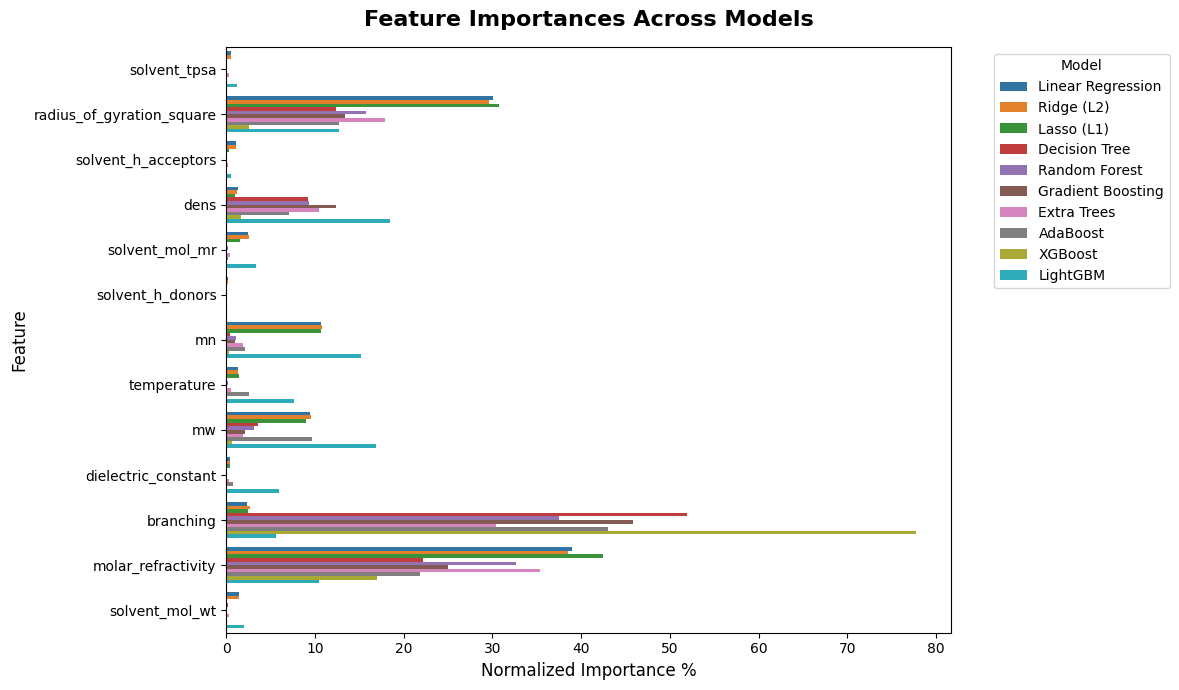

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing all the required models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor,
)
import xgboost as xgb
import lightgbm as lgb

# --- Helper Function to Extract Feature Importances ---
def get_feature_importances(model, feature_names):
    """Extracts feature importances or coefficients from different model types."""
    if hasattr(model, 'feature_importances_'):
        return pd.Series(model.feature_importances_, index=feature_names)
    elif hasattr(model, 'coef_'):
        return pd.Series(np.abs(model.coef_), index=feature_names)
    else:
        return pd.Series(np.zeros(len(feature_names)), index=feature_names)


# --- Main Function ---
def plot_all_feature_importances():
    # 1️⃣ Load and Prepare Data
    df = pd.read_csv('/kaggle/input/dataset-for-prediction-of-tg/data_augmented.csv')

    features = [
        'solvent_tpsa', 'radius_of_gyration_square', 'solvent_h_acceptors',
        'dens', 'solvent_mol_mr', 'solvent_h_donors', 'mn', 'temperature',
        'mw', 'dielectric_constant', 'branching', 'molar_refractivity',
        'solvent_mol_wt'
    ]
    target = 'tg'

    df_clean = df[features + [target]].dropna()
    X = df_clean[features]
    y = df_clean[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2️⃣ Define Models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge (L2)': Ridge(random_state=42),
        'Lasso (L1)': Lasso(random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Extra Trees': ExtraTreesRegressor(random_state=42, n_jobs=-1),
        'AdaBoost': AdaBoostRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1),
    }

    # 3️⃣ Train Each Model & Collect Importances
    importance_df = pd.DataFrame()

    for name, model in models.items():
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        pipeline.fit(X_train, y_train)
        model_importances = get_feature_importances(pipeline.named_steps['model'], features)

        # Normalize importances (so they sum to 100%)
        model_importances = (model_importances / model_importances.sum()) * 100
        importance_df[name] = model_importances

    # 4️⃣ Melt Data for Seaborn
    importance_df.reset_index(inplace=True)
    importance_df = importance_df.melt(id_vars='index', var_name='Model', value_name='Normalized Importance %')
    importance_df.rename(columns={'index': 'Feature'}, inplace=True)

    # 5️⃣ Plot (Exactly like the provided image)
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=importance_df,
        x='Normalized Importance %',
        y='Feature',
        hue='Model',
        palette='tab10'
    )

    plt.title('Feature Importances Across Models', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Normalized Importance %', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Run it
plot_all_feature_importances()
